In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun


import datetime
import seaborn as sns
sns.set()



In [2]:
%load_ext autoreload
%autoreload

In [3]:
# plotting dfs:
('roi_df_plotting.csv')
('top_percent_roi_plotting.csv')
('chi_plot.csv')

# modeling dfs:
('top_roi_for_melting.csv')
('chi_roi_for_melting.csv')
('top_zips_with_all_columns.csv')

'top_zips_with_all_columns.csv'

In [24]:
df_test = pd.read_csv('chi_plot.csv')
df_test.head()

,time,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60638,60639,60630,60643,60632,60605,60645,60651,60653,60654
0,2011-01,729300.0,923000.0,600000.0,286500.0,317400.0,722000.0,125300.0,337500.0,122200.0,...,172100.0,142700.0,228100.0,134600.0,133300.0,555800.0,289000.0,120100.0,276800.0,944900.0
1,2011-02,730200.0,925000.0,601600.0,285800.0,316300.0,723400.0,124300.0,339500.0,122200.0,...,171400.0,141600.0,227200.0,133400.0,132500.0,557400.0,288700.0,122000.0,272900.0,948800.0
2,2011-03,730700.0,923300.0,599700.0,283800.0,314000.0,724200.0,123100.0,340600.0,122500.0,...,170100.0,141200.0,225900.0,132300.0,131600.0,557600.0,287300.0,123200.0,269300.0,953700.0
3,2011-04,730000.0,916600.0,590500.0,282100.0,311400.0,722300.0,121500.0,340500.0,123300.0,...,168400.0,141300.0,224200.0,131200.0,130300.0,556500.0,284800.0,123300.0,266700.0,957500.0
4,2011-05,730100.0,912400.0,578900.0,281700.0,308200.0,724100.0,119800.0,339500.0,123500.0,...,166700.0,141500.0,223100.0,130300.0,129000.0,559100.0,281400.0,123100.0,262500.0,961000.0


In [25]:
# fun.plot(df)
# plt.legend()

In [36]:
df = pd.read_csv('top_zips_with_all_columns.csv')
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
2,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
3,84646,60647,Chicago,IL,Chicago,Cook,17,122700.0,122800.0,122800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
4,84620,60618,Chicago,IL,Chicago,Cook,20,142600.0,143100.0,143400.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [37]:
for col in df.columns:
    if col < '2011-01':
        df.drop([col], inplace=True, axis=1)

df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,2011-01,2011-02,2011-03,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,729300.0,730200.0,730700.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,84616,60614,Chicago,IL,Chicago,Cook,4,923000.0,925000.0,923300.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
2,84640,60640,Chicago,IL,Chicago,Cook,8,600000.0,601600.0,599700.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
3,84646,60647,Chicago,IL,Chicago,Cook,17,286500.0,285800.0,283800.0,...,459600,461400,464300,466500,467900,470600,474500,475100,472600,470200
4,84620,60618,Chicago,IL,Chicago,Cook,20,317400.0,316300.0,314000.0,...,462700,461200,459900,459200,458700,457900,457400,459000,462500,464300


In [38]:
def melt_data(df): # from flatiron starter notebook
    melted = pd.melt(df, id_vars=['RegionID','ZipCode', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time', value_name='MeanValue')
    melted['time'] = pd.to_datetime(melted['time'], format='%Y-%m')
    melted = melted.dropna(subset=['MeanValue'])
    return melted

In [39]:
# chi_values['time'] = pd.to_datetime(chi_values['Unnamed: 0'], infer_datetime_format=True)
# chi_values = chi_values.drop('Unnamed: 0', axis=1)
# chi_values = chi_values.set_index('time')
# chi_values.head(), chi_values.index

In [40]:
df = melt_data(df)
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,time,MeanValue
0,84654,60657,Chicago,IL,Chicago,Cook,1,2011-01-01,729300.0
1,84616,60614,Chicago,IL,Chicago,Cook,4,2011-01-01,923000.0
2,84640,60640,Chicago,IL,Chicago,Cook,8,2011-01-01,600000.0
3,84646,60647,Chicago,IL,Chicago,Cook,17,2011-01-01,286500.0
4,84620,60618,Chicago,IL,Chicago,Cook,20,2011-01-01,317400.0


In [41]:
df.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'time', 'MeanValue'],
      dtype='object')

In [42]:
df.set_index('time', inplace = True)
df.head()

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,MeanValue
time,,,,,,,,
2011-01-01,84654,60657,Chicago,IL,Chicago,Cook,1,729300.0
2011-01-01,84616,60614,Chicago,IL,Chicago,Cook,4,923000.0
2011-01-01,84640,60640,Chicago,IL,Chicago,Cook,8,600000.0
2011-01-01,84646,60647,Chicago,IL,Chicago,Cook,17,286500.0
2011-01-01,84620,60618,Chicago,IL,Chicago,Cook,20,317400.0


In [43]:
df.drop(['RegionID', 'City', 'State', 'Metro', 
                     'CountyName', 'SizeRank'], inplace=True, axis=1)
df.head()

,ZipCode,MeanValue
time,,
2011-01-01,60657,729300.0
2011-01-01,60614,923000.0
2011-01-01,60640,600000.0
2011-01-01,60647,286500.0
2011-01-01,60618,317400.0


In [107]:
# df.to_csv('chicago_melted.csv', index=False)

In [108]:
# df['MeanValue'] = df['MeanValue'].astype('int')

In [44]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='time', length=2640, freq=None)

In [34]:
# df = df.resample('MS')

In [20]:
# ts = (df[df['ZipCode']==x]['MeanValue'].copy())
# ts

In [21]:
# plot_pa

In [45]:
zip_dict = {}
zip_list = df.ZipCode.unique()
for x in zip_list:
    ts = (df[df['ZipCode']==x]['MeanValue'].copy())
    ts.name = x 
    zip_dict[x] = ts

In [46]:
zip_dict[60647]

time
2011-01-01    286500.0
2011-02-01    285800.0
2011-03-01    283800.0
2011-04-01    282100.0
2011-05-01    281700.0
                ...   
2017-12-01    470600.0
2018-01-01    474500.0
2018-02-01    475100.0
2018-03-01    472600.0
2018-04-01    470200.0
Name: 60647, Length: 88, dtype: float64

In [47]:
zip_df = pd.DataFrame(pd.concat(zip_dict))

In [48]:
zip_series = pd.concat(zip_dict)

In [49]:
zip_df.columns

RangeIndex(start=0, stop=1, step=1)

In [50]:
zip_df.head()

0
      time                
60657 2011-01-01  729300.0
      2011-02-01  730200.0
      2011-03-01  730700.0
      2011-04-01  730000.0
      2011-05-01  730100.0

In [82]:
# fun.plot(zip_df)
# # plt.legend(' ')
# plt.show()

In [125]:
# zip_df.plot(figsize=(15, 6))
# plt.show()
# print(zip_df.head())

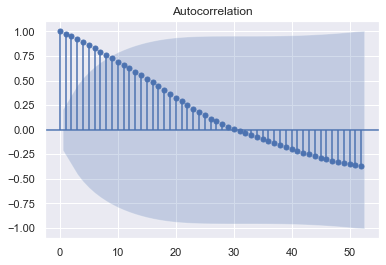

In [63]:
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(zip_dict[60647],lags=52);

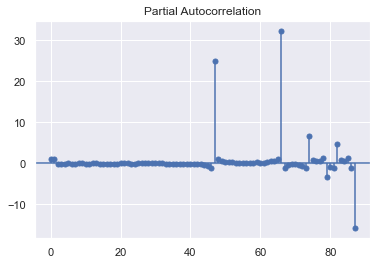

In [66]:
tsa.plot_pacf(zip_dict[60647],lags=160);

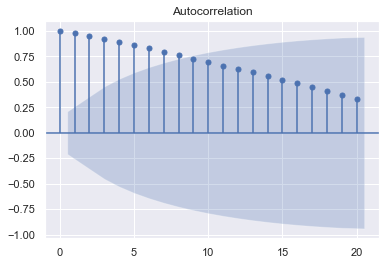

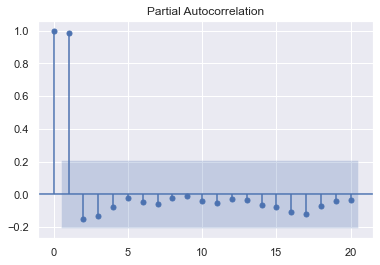

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# mpl.rcParams['figure.figsize'] = (12,4)
plot_acf(zip_dict[60647]);
plot_pacf(zip_dict[60647]);

In [60]:
zip_dfs[2]

,MeanValue
time,
2011-01-01,600000.0
2011-02-01,601600.0
2011-03-01,599700.0
2011-04-01,590500.0
2011-05-01,578900.0
...,...
2017-12-01,777900.0
2018-01-01,778500.0
2018-02-01,780500.0


In [62]:
zip_dfs

AttributeError: 'list' object has no attribute 'name'

#### where to go before modeling - or just jump straight in??


In [203]:
# What to do with null values?
# how many zip codes to run through?
# Visualizations?
# Presentation style?
# frequency matter?

In [92]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [51]:
df.head()

,ZipCode,MeanValue
time,,
2011-01-01,60657,729300.0
2011-01-01,60614,923000.0
2011-01-01,60640,600000.0
2011-01-01,60647,286500.0
2011-01-01,60618,317400.0


In [117]:
# df = df.copy()

In [86]:
# df.info()

In [56]:
zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['MeanValue']].copy()))

In [128]:
ans = []
for df, name in zip(zip_dfs, zip_list):
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2631.896914927915
Result for 60657 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2230.1241444403304
Result for 60657 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1835.8967857923926
Result for 60657 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1545.1953984562695
Result for 60657 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1736.3453462182174


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1744.9503794090601
Result for 60657 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1507.5619338306942
Result for 60657 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1430.2565965708097
Result for 60657 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2542.32942486121


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2325.3449766760277
Result for 60657 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1858.5068963762112
Result for 60657 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1510.2642437807594


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2228.1507241255786
Result for 60657 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2171.654954975607


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1513.3432296177343
Result for 60657 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1465.023288931178


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1716.9914715391449
Result for 60657 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1466.2406366168657
Result for 60657 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1479.958901455899
Result for 60657 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1234.7305269872932
Result for 60657 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1485.0760986416199
Result for 60657 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1468.5682665641884


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1252.3992473333344
Result for 60657 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1234.1490913869668
Result for 60657 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1618.3759538253748
Result for 60657 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1387.8396205418558


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1445.6244524795131
Result for 60657 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1174.1800059420134
Result for 60657 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1433.779741857437


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1388.3766946951455
Result for 60657 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1213.4934943333649


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60657 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1167.9810239381113
Result for 60657 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1686.664782673394
Result for 60657 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1460.661403212307
Result for 60657 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1501.7730983735207


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1257.9569494961427
Result for 60657 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1461.9428937962653
Result for 60657 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1462.597152194317
Result for 60657 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1254.5877257383709
Result for 60657 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1256.5095958943912


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1594.9022228389254
Result for 60657 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1373.1652336087398
Result for 60657 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1571.536731515011
Result for 60657 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1195.6316673240729


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1394.3637908677078


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1374.7920242022203
Result for 60657 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1214.7773983128125


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60657 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1187.4848272076388
Result for 60657 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1613.7799774291013
Result for 60657 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1395.4928171680847
Result for 60657 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1428.4681385490148
Result for 60657 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1196.4426241969793
Result for 60657 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1395.49321691033


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1397.1543862795559
Result for 60657 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1194.4524668750391
Result for 60657 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1195.665659993766
Result for 60657 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1598.3526079594235


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60657 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1340.7721815668456
Result for 60657 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1415.0740149067217
Result for 60657 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1151.2420467348259
Result for 60657 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1361.1756155929588


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1336.3073674211591


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60657 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1172.2751903047422
Result for 60657 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1152.5219107620042


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2675.7904142863777
Result for 60614 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2268.1547836468444
Result for 60614 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1888.5828129690676
Result for 60614 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1635.435793929755
Result for 60614 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1827.5827781815967


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1845.306808567102
Result for 60614 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1562.5018682639868
Result for 60614 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1457.2264682414152
Result for 60614 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2585.790674959585


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2369.0892215036215
Result for 60614 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1917.6303927798183


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60614 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1557.8161032038038
Result for 60614 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2266.661117391218
Result for 60614 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2209.1348213250308
Result for 60614 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1599.5438946435627


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1549.6714774182103
Result for 60614 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1765.3807235169959
Result for 60614 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1506.2822910746645
Result for 60614 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1519.4169277996502
Result for 60614 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1290.53518461345
Result for 60614 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1522.0970317384454


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1586.0408900855282
Result for 60614 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1276.7732873611606


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1255.9699073297118
Result for 60614 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1668.2068829483258
Result for 60614 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1407.7805188884433
Result for 60614 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1542.9711650890247


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1200.9986966958734
Result for 60614 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1475.2704520324435
Result for 60614 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1429.6894360595722


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1239.2925461631073


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1187.2708981458325
Result for 60614 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1742.6738645781934
Result for 60614 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2201.1706207257816
Result for 60614 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1541.8153696135632


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1282.710802594584
Result for 60614 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1503.645347109009
Result for 60614 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1722.4744816408204


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1280.7096100462813
Result for 60614 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1283.836214896594


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1644.4740857754255
Result for 60614 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2132.4108136590653


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1512.816850710785
Result for 60614 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1207.9913369910998
Result for 60614 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1432.3249721434306


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60614 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1452.2929851028996
Result for 60614 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1231.8179764460876
Result for 60614 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1208.6983727856848
Result for 60614 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1634.983062036804
Result for 60614 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1399.8844939330654
Result for 60614 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1449.5881965138458
Result for 60614 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1190.4109393377153


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1402.2869008372486
Result for 60614 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1400.0289298254193


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1172.1434328837402
Result for 60614 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1187.1469444418162
Result for 60614 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1621.6906369374617


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60614 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1340.532175266342
Result for 60614 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1441.2376460228716


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1144.1511613146154
Result for 60614 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1370.6804797327015


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60614 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1337.4119212268167
Result for 60614 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1173.462918773165


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60614 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1142.2781353166517
Result for 60640 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2580.446810117537
Result for 60640 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2185.7909600433404
Result for 60640 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1826.903117165098
Result for 60640 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1537.006411469318
Result for 60640 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1800.3947748657781
Result for 60640 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1717.0861843544867
Result for 60640 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1516.2564946239827
Result for 60640 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1460.2659406511311
Result for 60640 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2491.382205745691


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2133.3350382334165
Result for 60640 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1842.9104395808552


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1498.829378844883
Result for 60640 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2364.8273245848836
Result for 60640 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2127.6241232759126


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1537.0551030176669


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1488.629446459063
Result for 60640 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1739.2753852164906
Result for 60640 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1493.971915017428
Result for 60640 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1525.053011774889
Result for 60640 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1275.728557263454
Result for 60640 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1514.4524382147154
Result for 60640 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1494.263324766894
Result for 60640 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1294.6330287836975


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1275.1093256369895
Result for 60640 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1636.599414912322
Result for 60640 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1405.3455591536838
Result for 60640 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1488.7622724274745


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1210.1083899864873
Result for 60640 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1445.7050770812452
Result for 60640 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1406.3634699781114


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1251.0148343095825


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1209.670458133816
Result for 60640 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1747.529307838099
Result for 60640 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2335.8922277306024
Result for 60640 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1548.4414539630768


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1517.9790923310368
Result for 60640 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1500.7242443907005
Result for 60640 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1843.0924048447823
Result for 60640 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1296.7419543546696


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1298.729516499587
Result for 60640 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1650.2218073917015


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60640 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1409.9965868636514
Result for 60640 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1594.1439394316178


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60640 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1900.7545148730767
Result for 60640 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1431.5870250386217
Result for 60640 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1743.0505428233919
Result for 60640 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1254.5331514076756


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1233.8714635607073
Result for 60640 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1656.3426486235812
Result for 60640 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1419.3145381975703
Result for 60640 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1484.5845449465999
Result for 60640 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1232.3987941362793
Result for 60640 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1417.3961424354454


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1419.391625871394
Result for 60640 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1209.5780562929372


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60640 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1220.523563353211
Result for 60640 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1635.4512777830437
Result for 60640 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1365.1907060974784
Result for 60640 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1464.956018857267


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1190.0637987499651
Result for 60640 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1387.7712828098695
Result for 60640 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1367.1793760671071


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60640 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1208.0302529749695
Result for 60640 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1189.8332160243012
Result for 60647 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2478.2981972001576


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2102.3771986902475
Result for 60647 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1787.1019735095606


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1513.2253783709482
Result for 60647 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1720.2754099557158
Result for 60647 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1671.8928801546938
Result for 60647 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1500.905134485364


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2027.032044432856
Result for 60647 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2390.711926639102
Result for 60647 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2194.26250536535
Result for 60647 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1794.814974692212


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2181.2849301789174
Result for 60647 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2254.7203122411597
Result for 60647 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2170.056349024415


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1506.0413974440887


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2009.3982577616357
Result for 60647 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1646.7710118802036
Result for 60647 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1419.4269664565002
Result for 60647 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1440.3605884030521
Result for 60647 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1210.3640594766573
Result for 60647 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1435.569318892801
Result for 60647 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1418.1145326618253
Result for 60647 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1221.2822260965909


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1202.262630223794
Result for 60647 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1532.535170901328
Result for 60647 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1335.4033228262765
Result for 60647 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1392.9660648838055


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1143.3445140057215
Result for 60647 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1376.0080126031544
Result for 60647 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1336.9717001991894


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1175.9943627074606


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1132.0507378253928
Result for 60647 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1621.9051332816157
Result for 60647 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1461.1426553421907
Result for 60647 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1460.764510402516


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60647 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1236.9911598445294
Result for 60647 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1402.5517204699388
Result for 60647 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1450.9219496544295
Result for 60647 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1223.596214112713
Result for 60647 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1669.096876801427


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1528.119313031571
Result for 60647 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1388.7488991499818


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1430.8015461098803


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60647 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1146.3160726646227
Result for 60647 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1333.2596331862173
Result for 60647 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1314.80986035351
Result for 60647 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1180.4924163141436


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60647 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1353.9266961206217
Result for 60647 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1506.5090554137694
Result for 60647 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1303.3043398296447
Result for 60647 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1354.8549861376287
Result for 60647 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1142.2800596624832
Result for 60647 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1304.1996276681302


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1304.377234225694
Result for 60647 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1135.954553140681
Result for 60647 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1137.8759657527735
Result for 60647 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1485.269795750686


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1252.1089745729344
Result for 60647 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1338.492886923846
Result for 60647 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1091.352306932053


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60647 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1267.9493060111931
Result for 60647 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1253.6747580724784


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60647 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1106.586250176404
Result for 60647 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1090.5424307993903
Result for 60618 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2485.123730937731
Result for 60618 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2106.120411202871
Result for 60618 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1780.1509109899941


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1504.0903543614538
Result for 60618 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1749.8714545352511
Result for 60618 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1713.7846283035597
Result for 60618 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1514.641270733609


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2017.6856385321191
Result for 60618 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2397.3273834938577
Result for 60618 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2052.5162763538456
Result for 60618 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1788.1452661637395


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 463044.5536795093
Result for 60618 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2262.7577451652382
Result for 60618 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2046.9574500641784


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1474.3877577669045


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1454.623121543663
Result for 60618 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1639.9219569263814
Result for 60618 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1415.1309783895392
Result for 60618 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1453.935541474704


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1211.6460042208785
Result for 60618 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1434.3355458016983
Result for 60618 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1417.1957548372404
Result for 60618 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1220.7753849653404
Result for 60618 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1201.2397131075095


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1519.7005649612013
Result for 60618 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1327.1477310308428
Result for 60618 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1407.4939699774836


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1252.04002303789
Result for 60618 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1364.1093952504357
Result for 60618 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1328.4775932719908


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1167.9520885285513
Result for 60618 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1143.7215522675974
Result for 60618 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1632.141152439939
Result for 60618 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1506.4443407828853
Result for 60618 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1474.1104281669898


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1242.7523231215087
Result for 60618 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1392.9637989436853
Result for 60618 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1506.6811783789167
Result for 60618 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1225.029483322266


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60618 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1666.182887048362
Result for 60618 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1530.3283168718403
Result for 60618 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1309.2288575998946


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1439.3946431692866


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60618 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1139.8465654674926
Result for 60618 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1331.87837605486
Result for 60618 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1310.180282035332
Result for 60618 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1183.255435569851


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1390.6544986154913
Result for 60618 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1481.8044780444043
Result for 60618 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1279.6455485914817
Result for 60618 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1334.7887505489832


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1112.9533232466258
Result for 60618 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1280.0270965496336
Result for 60618 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1281.4987155101187
Result for 60618 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1102.8647904864326


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1099.7315164834554
Result for 60618 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1457.6978569523515
Result for 60618 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1201.4477933182884
Result for 60618 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1311.569357558003


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60618 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1053.7141640205018
Result for 60618 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1227.351370958186
Result for 60618 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1203.394010321649


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60618 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1072.0626651215787
Result for 60618 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1052.2213033798662
Result for 60613 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2628.633348098734
Result for 60613 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2227.6281414979717
Result for 60613 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1844.0589174068728


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1559.2006290008953
Result for 60613 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1701.416567344029
Result for 60613 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1657.7384059056847
Result for 60613 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1497.2468827483913


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1459.8956789797999
Result for 60613 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2539.065150535479


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2174.370642552225
Result for 60613 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1866.7587656074352


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1518.349031775532
Result for 60613 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2225.205775807346
Result for 60613 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2168.7902899557953


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1553.7958990088155
Result for 60613 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1514.324366707393


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1718.6184074954
Result for 60613 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1475.5915901235162
Result for 60613 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1461.1053634932127
Result for 60613 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1225.3367203851167
Result for 60613 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1473.0492539020001
Result for 60613 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1454.7643794065732


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1231.4577286639344
Result for 60613 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1214.0646062738028
Result for 60613 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1622.4724601993366


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1392.574913093651
Result for 60613 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1431.2419622521036


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1162.1297393361506
Result for 60613 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1435.20035496508
Result for 60613 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1391.7801304135328


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1205.5073497854453


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1163.419488555153
Result for 60613 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1666.7993347405898
Result for 60613 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1917.9825541756827
Result for 60613 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1482.6816874612778


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1251.4869093291877
Result for 60613 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1502.9272652320403
Result for 60613 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1443.234893235571
Result for 60613 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1234.602200740765


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1235.8504523157062
Result for 60613 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1581.6803885368786
Result for 60613 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1844.4889191008526
Result for 60613 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1475.7168181682814


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1847.2375803456077
Result for 60613 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1378.4330800773646
Result for 60613 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1357.0705576509233
Result for 60613 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1204.9895635608125


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1183.9724155076597
Result for 60613 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1608.9466113323074
Result for 60613 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1388.7676841304026
Result for 60613 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1428.1460070330652
Result for 60613 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1194.152679777773
Result for 60613 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1389.1229531308652


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1390.6249492126146
Result for 60613 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1183.196606697877


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60613 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1185.195153638752
Result for 60613 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1590.9812954998986
Result for 60613 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1340.1065970033892
Result for 60613 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1418.3515705705222


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1151.5997687385616
Result for 60613 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1360.799413874269
Result for 60613 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1336.6386684621207


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60613 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1183.445869990197
Result for 60613 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1162.9506450137517
Result for 60629 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2300.6884160480035


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1946.2988567035743
Result for 60629 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1600.6328757216156
Result for 60629 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1346.778111650077


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1578.084447258302
Result for 60629 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1459.8690438337837
Result for 60629 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1337.8662591948491
Result for 60629 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1707.155058790478
Result for 60629 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2214.8477157635225
Result for 60629 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1995.412769063562
Result for 60629 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1586.6887290135858


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2792.377599243707
Result for 60629 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1938.6101278936246
Result for 60629 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1889.558783312855


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1311.6980389785872
Result for 60629 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1709.051544075425
Result for 60629 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1448.6709911452233


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1230.538770721653
Result for 60629 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1269.5366625104443
Result for 60629 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1034.9011438101732
Result for 60629 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1247.6442290300627


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1231.2111671445498
Result for 60629 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1046.0649089648296
Result for 60629 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1030.2770446858344


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1341.3948794686175
Result for 60629 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1137.3260937026496
Result for 60629 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1229.453460483482


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 959.5684087972636
Result for 60629 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1171.629556329676
Result for 60629 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1137.028221083507


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1013.9251608224644
Result for 60629 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 975.9089153554004


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1448.3520124674806
Result for 60629 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1212.0282345519986
Result for 60629 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1285.8257345734328


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1063.286980672718
Result for 60629 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1276.274810446926
Result for 60629 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1276.3849296289175
Result for 60629 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1055.8500160986525
Result for 60629 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1056.647734118734
Result for 60629 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1355.926175182994


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1149.6363319300635
Result for 60629 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1256.4736010709962


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60629 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 995.3530488634276
Result for 60629 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1165.9860842769301
Result for 60629 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1150.3229211150365
Result for 60629 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1017.8902674487287


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 999.6993200924288
Result for 60629 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1314.367749678193
Result for 60629 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1131.8080419273485
Result for 60629 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1197.6431067067301


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 996.7645708153146
Result for 60629 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1130.9813013148068
Result for 60629 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1132.8274857517067


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 979.581838418759
Result for 60629 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 981.0912801512301


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1292.4387002080443
Result for 60629 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1088.5992533244766
Result for 60629 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1180.7815551075312


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60629 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 940.4553399649234
Result for 60629 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1100.3974592033533


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1081.415689955671
Result for 60629 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 979.7130263697162


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60629 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 963.5669802011911
Result for 60625 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2487.035371576133
Result for 60625 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2105.673264026055
Result for 60625 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1748.5032747091732
Result for 60625 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1476.956776783456
Result for 60625 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1717.1123468547655


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1647.1888072848974
Result for 60625 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1486.2138985034899
Result for 60625 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1417.180940001871
Result for 60625 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2399.0868864106906


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2053.9564915431674
Result for 60625 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1686.6129516433973
Result for 60625 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1432.9180190200746


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2265.393825285314
Result for 60625 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2179.8696300011443
Result for 60625 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1472.6802599221198


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1424.189710641536
Result for 60625 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1605.0535726081273
Result for 60625 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1378.3037211939259
Result for 60625 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1410.3464459818
Result for 60625 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1177.1907540462255
Result for 60625 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1401.0893766595275


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1382.3111785914855
Result for 60625 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1191.5252651549351
Result for 60625 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1174.9626240452226
Result for 60625 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1512.491192296238


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1281.196014354982
Result for 60625 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1366.1777855832258
Result for 60625 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1119.9832326796527


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1337.9670280425653
Result for 60625 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1299.642476285382


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1147.7648588343777


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1092.841136937052
Result for 60625 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1594.6108621864273
Result for 60625 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1368.1658354087945
Result for 60625 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1434.3232177957073


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60625 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1204.355907670222
Result for 60625 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1369.1254325785221
Result for 60625 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1371.1241257090303
Result for 60625 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1194.9412554919413
Result for 60625 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1204.732262623751
Result for 60625 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1501.9098431333011


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1286.5306457497888
Result for 60625 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1404.7222015207785


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60625 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1481.8958025912334
Result for 60625 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1307.4577601427868
Result for 60625 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1286.8868405688117
Result for 60625 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1151.8607199660505


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1131.3033811878915
Result for 60625 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1474.007478303936
Result for 60625 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1263.8010596693296
Result for 60625 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1315.4315960641354


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1089.6629972705266
Result for 60625 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1264.204781612287
Result for 60625 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1265.4599697623773


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1073.4297553812394
Result for 60625 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1081.887076380736
Result for 60625 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1457.2626068984134


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1211.5831620551123
Result for 60625 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1298.2867553327205
Result for 60625 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1054.2007422633274


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60625 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1237.26637790333
Result for 60625 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1212.1402122766415


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60625 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1073.3964321832734
Result for 60625 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1053.2788730497211


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60619 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2278.3095054518903
Result for 60619 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 170596.4244558974
Result for 60619 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1617.5964602647664


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1360.5285720292334
Result for 60619 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1640.9464306690302
Result for 60619 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1595.167908942929
Result for 60619 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1359.7352047779245


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1723.2331745728557
Result for 60619 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2192.346357377163


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60619 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 154367.22560107708
Result for 60619 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1601.310342816346
Result for 60619 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1897.541057414743


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1918.7188143194066
Result for 60619 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1971.026854408808
Result for 60619 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1353.371160272205


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1680.7583014598092
Result for 60619 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1521.4286894593354
Result for 60619 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1289.0706061291642
Result for 60619 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1392.6075420439008
Result for 60619 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1147.7984155042689


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1313.5414993043612
Result for 60619 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1294.6920707656484
Result for 60619 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1142.1239546313113
Result for 60619 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1120.5440286593293


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1435.8869303311376
Result for 60619 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1219.7833747568454
Result for 60619 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1337.4109956853058


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1077.3928464882563
Result for 60619 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1269.5898038553664
Result for 60619 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1222.242130215281


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1144.5797527810398
Result for 60619 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1091.8598197578197
Result for 60619 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1539.8837365991512


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1309.223989850573
Result for 60619 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1411.0817217846038


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60619 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1190.5898635074884
Result for 60619 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1314.1683254703428
Result for 60619 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1425.912575657346
Result for 60619 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1156.3258601256084


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60619 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1148.9445040251087
Result for 60619 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1464.2601997087722
Result for 60619 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1242.1466580482886


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60619 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1376.4662966653834
Result for 60619 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1587.1378030883902


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1271.2510450561415
Result for 60619 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1350.2550670962762
Result for 60619 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1139.456701540814


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60619 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1116.0003511464797
Result for 60619 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1435.972530303893
Result for 60619 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1241.7668987219436
Result for 60619 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1305.4765304098325
Result for 60619 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1090.744702199317
Result for 60619 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1240.6898043808594
Result for 60619 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1242.6380292595418
Result for 60619 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1081.6110559542685


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1082.9536317303841
Result for 60619 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1406.2222541932128
Result for 60619 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1206.356785858484
Result for 60619 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1284.342254386064


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1054.3360025449665
Result for 60619 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1222.9785211431315
Result for 60619 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1206.9107674251945


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60619 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1079.5858147887766
Result for 60619 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1055.0528190691912
Result for 60610 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2637.015853286278


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2234.274012152057
Result for 60610 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1864.0277254925086


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1574.5770305352735
Result for 60610 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1825.6958698902936
Result for 60610 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1817.1450102935012
Result for 60610 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1585.4758833840153


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2192.795818260903
Result for 60610 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2547.4955382459034


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2346.853702122328
Result for 60610 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1886.7210036982053


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1502.3675046952726
Result for 60610 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2423.3524557408327
Result for 60610 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2329.8053896537026


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1581.7057287551334


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1493.3396648717533
Result for 60610 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1759.0977847114414
Result for 60610 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1545.6435401206968
Result for 60610 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1561.829276208561


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1335.9103263759248
Result for 60610 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1542.419371288186
Result for 60610 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1548.4269669442513
Result for 60610 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1314.8381473552477


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1295.7548878646664
Result for 60610 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1653.843168282956
Result for 60610 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1432.506629812096
Result for 60610 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1519.089583277634


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1244.7657985065134
Result for 60610 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1469.8115731253258
Result for 60610 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1433.5288584225927


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1281.620258591979
Result for 60610 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1244.8615714753764


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1755.9856870949948
Result for 60610 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2057.8083444318113
Result for 60610 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1583.4027123685273


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1339.6137315085496
Result for 60610 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1521.3255057367824
Result for 60610 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1779.896089834053
Result for 60610 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1318.4815587540359


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1320.19843060718
Result for 60610 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1659.020303780517


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1706.5421908510084
Result for 60610 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1633.3747785544429


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60610 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2007.0169741778616
Result for 60610 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1452.9219770609175
Result for 60610 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1705.0449356184733
Result for 60610 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1283.5789091734862


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60610 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1890.0252398023383
Result for 60610 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1656.2876110769332
Result for 60610 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1430.052255830613
Result for 60610 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1492.7122374873588
Result for 60610 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1244.9674275819857


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1430.8853015762222
Result for 60610 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1431.0205919284513
Result for 60610 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1226.4090849903212
Result for 60610 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1228.4065856194427
Result for 60610 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1645.0700621651795
Result for 60610 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1377.3145217483493
Result for 60610 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1486.010651758438


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60610 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1201.1301258321625
Result for 60610 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1400.1945519666394


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1379.1555658962268
Result for 60610 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1217.892039136992


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60610 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1194.6720750934298
Result for 60620 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2272.2763789493965
Result for 60620 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 174436.5738903685
Result for 60620 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1628.265074875835


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1353.1322367496105
Result for 60620 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1652.4995460104362
Result for 60620 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1582.7666992884053
Result for 60620 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1373.352295897131


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1727.4219072357307
Result for 60620 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2186.2041659524216


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 170794.6888272088
Result for 60620 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1609.3286973053303


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60620 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1257.648787827451
Result for 60620 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2040.1065376545534
Result for 60620 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1965.4707165259765
Result for 60620 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1336.5379219909105


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1681.6867933133428
Result for 60620 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1522.3616229565123
Result for 60620 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1300.7172593876996
Result for 60620 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1370.7364762818709
Result for 60620 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1135.7884515408273


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1323.5906791009247
Result for 60620 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1302.5333953675374
Result for 60620 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1148.2191550173493
Result for 60620 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1129.7771436401554


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1427.8846204178524
Result for 60620 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1219.2245749814208
Result for 60620 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1317.8078894624011


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1057.4910584533327
Result for 60620 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1255.4599493123867


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1217.0810223542007
Result for 60620 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1121.0556459129648


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1071.6997023871409
Result for 60620 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1541.185202846428
Result for 60620 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1322.8429842353553
Result for 60620 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1389.84045974982


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1168.3807034530878
Result for 60620 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1323.641982454545
Result for 60620 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1393.5378545260505
Result for 60620 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1152.5074137010045


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60620 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1152.3123448472743
Result for 60620 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1457.8586454416134
Result for 60620 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1243.1439541063596


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1354.4392348825643


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60620 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1101.4153782576402
Result for 60620 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1261.65062751857


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1245.0970645517777
Result for 60620 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1106.9492014184693


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1192.5553108053819
Result for 60620 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1428.1950144603434
Result for 60620 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1226.1522001177177
Result for 60620 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1291.708370599809


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1068.758282925895
Result for 60620 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1225.4082759575167
Result for 60620 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1227.531963011598


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1068.152288302809
Result for 60620 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1069.5338330738434
Result for 60620 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1398.365647572289


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60620 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1191.8775951434234
Result for 60620 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1265.5901365989737


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1028.5204017464189
Result for 60620 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1207.9830014383297


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1191.2853920438195
Result for 60620 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1055.196017349339


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60620 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1027.9694810668252
Result for 60634 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2388.1824624596434
Result for 60634 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2023.2380858285621
Result for 60634 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1684.0581697953066


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1420.9062902234982
Result for 60634 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1669.1259768208663
Result for 60634 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1607.0258074339524
Result for 60634 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1419.009034052934


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1350.9914391938257
Result for 60634 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2301.4557662576303
Result for 60634 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1970.0379284287621
Result for 60634 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1680.088336014923


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2078.3795022159643
Result for 60634 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2160.8734806054244
Result for 60634 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2080.744150902646


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1387.3317744508158
Result for 60634 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1336.709965799367
Result for 60634 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1532.0592496970514
Result for 60634 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1300.228525967931


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1330.595594462927
Result for 60634 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1106.4746106614762
Result for 60634 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1319.6908900193384


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1302.2205646466343
Result for 60634 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1126.9450337827802
Result for 60634 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1129.594022963644


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1417.7550110881202
Result for 60634 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1203.1846554586643
Result for 60634 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1290.0916570169763


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1017.1768313046068
Result for 60634 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1248.318665357362


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1204.5102471237376


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1064.5670852609367
Result for 60634 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1035.2242032674915
Result for 60634 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1527.879691542303


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1287.9776661732328
Result for 60634 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1348.7763165613385


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1129.131286376093
Result for 60634 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1349.6663672214784
Result for 60634 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1290.065462451691


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1129.25940346474
Result for 60634 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1128.8863740245924
Result for 60634 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1433.558521789283


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1222.7664143716443
Result for 60634 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1320.6626259459367


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60634 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1044.634363271987
Result for 60634 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1240.672076427378


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1223.2650038191737
Result for 60634 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1078.4637470633852


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1058.2454743074825
Result for 60634 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1359.7602198853103
Result for 60634 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1168.4933651981705
Result for 60634 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1230.5636734074951


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1015.9633074227813
Result for 60634 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1167.6653610471194
Result for 60634 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1169.4741978989339


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1000.4064433035902


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1002.2318203490419
Result for 60634 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1340.5891775483515
Result for 60634 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1128.23463075143


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1214.9699377490804
Result for 60634 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 971.6539920695394


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60634 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1147.2162735281306
Result for 60634 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1123.2519796546273
Result for 60634 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 993.7601569064649


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60634 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 972.5146554396089
Result for 60626 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2470.4502722725033
Result for 60626 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2089.6801766658564
Result for 60626 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1720.7804849810627


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1446.6619831669075
Result for 60626 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1712.71826343908
Result for 60626 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1659.255861432444
Result for 60626 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1464.0962809081486


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1945.9181252490987
Result for 60626 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2382.609038606097


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60626 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2039.5445605932935
Result for 60626 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1719.9984249267945
Result for 60626 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2180.244215611619


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2086.9428356781073
Result for 60626 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2034.072424809871
Result for 60626 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1442.3776508415326


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1393.8993493386752
Result for 60626 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1644.6842698008559
Result for 60626 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1414.6456856377943
Result for 60626 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1468.819286280603
Result for 60626 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1205.2840978948525


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1436.3319160515825
Result for 60626 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1418.3047309344336
Result for 60626 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1223.8487369524703
Result for 60626 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1204.5752405263884
Result for 60626 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1546.0395995220078


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1327.3377610973316
Result for 60626 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1420.6832963476634
Result for 60626 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1152.8328330770084


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1367.6959272021252
Result for 60626 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1332.0805034721193
Result for 60626 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1184.5636688964157


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1143.2782067918724
Result for 60626 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1660.1249576401779
Result for 60626 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1427.675504445154


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1491.0665109417273


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60626 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1238.0340966111166
Result for 60626 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1428.3604605890114
Result for 60626 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1645.5886398351486
Result for 60626 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1231.4388825761457


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1688.4266610613506
Result for 60626 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1565.0216861444524


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60626 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1344.0047053079766
Result for 60626 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1461.046567377693


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60626 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1685.0741435612208
Result for 60626 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1360.6433221229634
Result for 60626 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1345.2130654293405
Result for 60626 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1195.5901494665347


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60626 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1365.237185906557
Result for 60626 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1573.5142738860961
Result for 60626 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1353.9301925912341
Result for 60626 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1411.2969985257046
Result for 60626 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1173.19587292196


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1354.1615289117592
Result for 60626 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1353.5229545753086
Result for 60626 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1166.4066661800855


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1170.6876205031385
Result for 60626 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1557.1306577400248
Result for 60626 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1304.5174038668586
Result for 60626 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1388.594363784528


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1125.6164755131733
Result for 60626 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1321.8584392415505
Result for 60626 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1300.60682278047


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60626 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1147.6654640718136


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60626 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1124.4652607368305
Result for 60649 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2318.470380070771
Result for 60649 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1955.6500942893645
Result for 60649 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1691.525015221827
Result for 60649 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1427.2214849773945


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1715.1173213218347
Result for 60649 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1690.435910404008
Result for 60649 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1425.9233232470062
Result for 60649 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1404.8530307558349


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2232.069829467885
Result for 60649 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1910.1224744779463
Result for 60649 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1679.0108929973148


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1355.4997777388005
Result for 60649 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2088.1039511430195
Result for 60649 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1904.700523697844
Result for 60649 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1398.7169654239533


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1354.3471974498834
Result for 60649 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1622.511859445446
Result for 60649 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1361.3323081456467
Result for 60649 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1473.6075063364153


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1238.943174782569
Result for 60649 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1407.810077984312
Result for 60649 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1378.558169675465
Result for 60649 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1228.0049175018694
Result for 60649 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1214.4715531125275
Result for 60649 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1530.7671430422408
Result for 60649 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1284.8369646562585
Result for 60649 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1419.3320426908517


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1159.2734005746863
Result for 60649 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1354.8346724009436
Result for 60649 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1286.1591218020694


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60649 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1210.531290422321
Result for 60649 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1165.4350932408722


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1642.0600184681232
Result for 60649 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1501.7915161214592
Result for 60649 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1493.2345905003729
Result for 60649 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1251.3859845560694
Result for 60649 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1410.1943857271021
Result for 60649 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1502.5116535262903
Result for 60649 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1234.4049913729905


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1236.3452285255255
Result for 60649 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1546.3361070421095
Result for 60649 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1417.6309954719425
Result for 60649 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1507.6359224930525


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1200.4467899579292
Result for 60649 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1360.8898805544152


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60649 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1417.8164453533882
Result for 60649 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1218.7688368623644


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60649 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1195.1858835033772
Result for 60649 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1534.865041484384
Result for 60649 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1364.1981371866984
Result for 60649 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1392.6440416434484


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1170.8238113134882
Result for 60649 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1318.5335235635353
Result for 60649 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1320.4918563484648


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1149.712266506811
Result for 60649 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1154.4761334518832
Result for 60649 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1505.54261884853


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1270.2608402518035
Result for 60649 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1375.091423426493


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60649 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1122.47538577901
Result for 60649 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1301.3353570877682
Result for 60649 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1272.2463578691454
Result for 60649 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1151.6632731117236


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60649 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1124.5230156976263
Result for 60616 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2454.088121755898
Result for 60616 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2075.037242327417
Result for 60616 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1711.417763096861


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1472.757048429274
Result for 60616 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1715.8926778245457
Result for 60616 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1692.043533654361
Result for 60616 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1467.0640480618847


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1444.8603628351811
Result for 60616 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2366.5017407627242
Result for 60616 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2171.9483535073787


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1716.2262245624102
Result for 60616 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1400.4519709560511
Result for 60616 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2072.759178734454
Result for 60616 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2020.2590450323664


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1420.931244083883
Result for 60616 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1394.580176295146
Result for 60616 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1583.7577044410534
Result for 60616 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1364.361569193897
Result for 60616 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1424.9416501150636


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1174.8922583352044
Result for 60616 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1384.976979712391
Result for 60616 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1363.794897489084
Result for 60616 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1186.1879352285916


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1164.554090805801
Result for 60616 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1489.8754717202062
Result for 60616 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1266.619625847067
Result for 60616 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1379.7076098388734


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1097.3381356779419
Result for 60616 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1316.6720770178601
Result for 60616 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1282.6097013161761


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1160.6022744525535


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1120.2154238808462
Result for 60616 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1593.735580279312
Result for 60616 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1520.20093128569
Result for 60616 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1445.3252685013224


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1205.2673151903575
Result for 60616 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1367.8167744730479


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60616 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1365.5231119785205
Result for 60616 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1193.6277428186506
Result for 60616 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1194.5760072215205
Result for 60616 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1500.7188020099811


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1286.172778171156
Result for 60616 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1516.0678610941286
Result for 60616 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1145.445077496707


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1309.1483199269558
Result for 60616 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1287.9346687088364


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1166.8594562893904


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1145.7946865217748
Result for 60616 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1475.4107233996615
Result for 60616 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1262.907827730849
Result for 60616 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1318.0226596846646


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1081.6509570938201
Result for 60616 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1263.0920996148097
Result for 60616 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1263.9765468535954


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1070.8894854539178


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1071.8765232578337
Result for 60616 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1457.4821803198488
Result for 60616 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1217.382844716515
Result for 60616 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1303.3952852233494


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1047.879682272317
Result for 60616 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1241.1878592794155
Result for 60616 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1214.9141963358938


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60616 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1072.2642345234096


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60616 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1050.9479566113177
Result for 60622 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2577.2025362541317
Result for 60622 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2185.4816631813496
Result for 60622 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1849.4563271987186


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1565.9136853254058
Result for 60622 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1789.159367895854
Result for 60622 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1738.2009154014277
Result for 60622 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1560.1499340360717


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2120.8222589079355
Result for 60622 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2488.3900719146336
Result for 60622 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2289.148629856591
Result for 60622 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1868.5592233560824


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2466.4651761730506
Result for 60622 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2360.1443388499333
Result for 60622 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2269.806473244174


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1565.8647615272607


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 2066.4536629199256
Result for 60622 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1730.0240441104665
Result for 60622 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1495.6804895437722
Result for 60622 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1519.4287810176543
Result for 60622 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1277.9137750377538


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1511.596028163817
Result for 60622 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1494.2281567570344
Result for 60622 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1276.8795571899147
Result for 60622 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1258.6324339542953
Result for 60622 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1633.0804224344438
Result for 60622 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1405.8672359576549
Result for 60622 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1473.3427879827736


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1215.0709040101844
Result for 60622 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1444.3335238076943
Result for 60622 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1407.8021622923998


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1253.1826945834723
Result for 60622 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1205.9336326392215
Result for 60622 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1712.8291563787816


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2017.323767444817
Result for 60622 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1541.4434756287822


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60622 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1305.1083946919773
Result for 60622 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1472.9928722488742
Result for 60622 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1623.9986699013152
Result for 60622 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1281.3208742926438


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60622 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1884.2343560801307
Result for 60622 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1622.841604537422


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60622 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1390.110140953613
Result for 60622 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1593.5607026061423


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60622 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1870.622711263506
Result for 60622 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1405.3835685403315
Result for 60622 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1385.2301674089065
Result for 60622 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1256.7419220121546


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60622 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1651.8872360924897
Result for 60622 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1598.0123984703075
Result for 60622 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1372.4133329501908
Result for 60622 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1429.6828739806726


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60622 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1199.2006948914661
Result for 60622 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1373.1500326638998
Result for 60622 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1374.32077267544
Result for 60622 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1189.8041072104604


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1191.4968992727565
Result for 60622 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1574.1734890526855
Result for 60622 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1321.872832588932
Result for 60622 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1415.566481703466


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1155.2630542355967
Result for 60622 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1343.5356158079178
Result for 60622 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1323.7519884803078


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60622 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1193.25293261685
Result for 60622 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1166.4876529445344


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2500.3481145112423
Result for 60615 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2113.998008132829
Result for 60615 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1732.6093801657848
Result for 60615 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1467.4142361168263
Result for 60615 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1732.4923456795


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1705.2121855553526
Result for 60615 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1489.486535475065
Result for 60615 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1465.9625628692784
Result for 60615 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2412.246259029667
Result for 60615 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2215.5291749170906
Result for 60615 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1740.5901588888044
Result for 60615 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1396.0869194071086


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2113.1596776882907
Result for 60615 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2059.6315737255272
Result for 60615 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1464.9230490733385


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1417.1995087310058
Result for 60615 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1636.4671268583663
Result for 60615 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1417.9493788851403
Result for 60615 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1473.3435052374716
Result for 60615 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1240.031045334022


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1436.378869297198
Result for 60615 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1420.0313402024651
Result for 60615 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1239.9500618630036
Result for 60615 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1223.5436947028454


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1539.078372706247
Result for 60615 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1334.2443375846228
Result for 60615 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1426.9777061152606


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1173.970677277376
Result for 60615 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1374.9415726219486
Result for 60615 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1335.841487855202


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1212.6284139391091
Result for 60615 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1182.306006999374
Result for 60615 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1648.9725743289482


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1488.8730636556622
Result for 60615 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1493.5658617466756
Result for 60615 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1262.3165110076886


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1422.2586750561272
Result for 60615 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1423.2787108617877
Result for 60615 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1243.4794447105678


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1245.479199727026
Result for 60615 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1560.6088767701808


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60615 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1339.1311975803494
Result for 60615 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1462.1227634003478


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1196.811342925632
Result for 60615 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1364.6807163242522


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1345.5298226822536
Result for 60615 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1224.9049816330792


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60615 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1206.581228920973
Result for 60615 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1540.0868814804949
Result for 60615 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1334.6065472757668
Result for 60615 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1391.1514586839528
Result for 60615 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1173.089776243771


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1334.120516270684
Result for 60615 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1336.0350977797984
Result for 60615 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1155.7789164751184


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1157.741474671504
Result for 60615 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1516.5255494740234
Result for 60615 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1297.0559830367904
Result for 60615 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1371.6422298805176


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1143.4825351885752
Result for 60615 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1315.4812962352196
Result for 60615 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1297.708652288526


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60615 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1154.9445552072805
Result for 60615 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1137.320581409998
Result for 60641 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2397.0074169558507


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2031.4905386791652
Result for 60641 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1707.360080269999
Result for 60641 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1441.366019578473
Result for 60641 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1662.4843844141105
Result for 60641 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1604.425058106937


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1430.813827658953
Result for 60641 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1320.8402475813882
Result for 60641 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2310.2224569305668


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 387537.2112518351
Result for 60641 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1704.5754960839915
Result for 60641 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1392.4068894409174


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2023.1548140555765
Result for 60641 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2089.069960413158
Result for 60641 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1406.4720840182617
Result for 60641 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1357.230773981839
Result for 60641 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1564.9638425627058
Result for 60641 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1330.4844789409754


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1358.109665289371
Result for 60641 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1128.9912975660175
Result for 60641 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1350.2803765985873


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1332.4309904314753
Result for 60641 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1149.5428615348326
Result for 60641 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1149.3049952735967


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1450.1404166396774
Result for 60641 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1232.8522906195506
Result for 60641 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1317.3441344810765


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1050.7366546775074
Result for 60641 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1277.6009957977278


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1234.5716434735916


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1089.486079241634


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1059.2765318411996
Result for 60641 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1552.9107766816562
Result for 60641 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1317.5212482150514
Result for 60641 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1378.37922011492


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1153.079152628434
Result for 60641 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1389.9416076898892
Result for 60641 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1319.537263629932


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1152.1390812972136
Result for 60641 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1154.0734586245726


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1453.2804539290373
Result for 60641 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1238.1143318490315


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60641 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1347.9017958146942


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60641 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1069.3945776283367
Result for 60641 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1256.9741445898078
Result for 60641 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1239.8196925845384


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1099.3269052013127


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1077.1519900673866
Result for 60641 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1422.5815849839405
Result for 60641 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1211.8485657646847
Result for 60641 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1270.9167247016749


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1048.0397094224775
Result for 60641 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1213.9423915316686
Result for 60641 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1213.342664828681


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60641 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1046.1752099814437
Result for 60641 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1047.9044264543095


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1402.1360811141717
Result for 60641 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1157.447427699757


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1252.4023756125973


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1009.5722110391749
Result for 60641 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1183.571211732678


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1153.7548509586597
Result for 60641 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1030.3097052104256


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60641 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1010.4463081862059
Result for 60660 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2518.9422798797673
Result for 60660 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2132.316734142867
Result for 60660 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1769.2871162728104


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1493.4115994402198
Result for 60660 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1770.4584012208934
Result for 60660 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1729.4996336470106
Result for 60660 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1508.8797280997276


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2019.5571094287918
Result for 60660 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2430.556556917322
Result for 60660 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2213.762595860912
Result for 60660 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1776.3697860476102


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 500002.5372243343
Result for 60660 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2129.3013096685922
Result for 60660 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2212.4382350434357
Result for 60660 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1489.6462226100764


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1414.9457829214011
Result for 60660 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1686.2490110704982
Result for 60660 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1454.6505369744425
Result for 60660 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1513.3735649674504
Result for 60660 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1257.8553173165215


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1473.3964437432726
Result for 60660 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1456.684538390557
Result for 60660 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1266.6916562376205


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1248.543422399302
Result for 60660 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1591.966165481623
Result for 60660 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1366.1804229861802
Result for 60660 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1513.5998996926146


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1193.384409819357
Result for 60660 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1404.7486350226127
Result for 60660 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1367.233113090117


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1242.6245892639645
Result for 60660 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1203.6546435710643


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1700.7068005859396
Result for 60660 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1651.26487387213
Result for 60660 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1533.1015531911255


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1289.4309499561225
Result for 60660 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1459.7591660545374
Result for 60660 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1639.8358121984731
Result for 60660 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1271.8659067188853


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1747.1867502143737
Result for 60660 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1610.5562951742588


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1370.7137893637776
Result for 60660 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1501.7894381632327


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60660 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1278.5043927192326
Result for 60660 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1395.8394489503455
Result for 60660 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1595.6967354122858


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60660 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1243.2072347790431
Result for 60660 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1493.8045210464438
Result for 60660 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1592.967525411357
Result for 60660 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1370.494343137585
Result for 60660 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1447.5379697640406


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1201.116004167608
Result for 60660 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1367.7507837564478
Result for 60660 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1367.7972260128993
Result for 60660 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1193.027611698157


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1193.6040092485982
Result for 60660 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1572.4430559030043
Result for 60660 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1322.5742875165404


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1427.3744222445187
Result for 60660 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1161.2663000125344
Result for 60660 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1344.8744776320923


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1319.88624350316
Result for 60660 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1185.0007396092813


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60660 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1161.559431367276
Result for 60608 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2369.669948086603
Result for 60608 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2004.1670180211484
Result for 60608 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1681.3767222874756


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60608 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1423.953869811949
Result for 60608 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1679.338627718629
Result for 60608 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1649.3202439383695
Result for 60608 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1424.417582845568


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1848.7979877550756
Result for 60608 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2283.0145945774398
Result for 60608 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1953.7609020230107
Result for 60608 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1675.6737576476883


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2055.223222046579
Result for 60608 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1999.016079397036


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60608 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2062.06902521623
Result for 60608 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1406.9928118968633


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1847.5790378629347
Result for 60608 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1561.7001981575804
Result for 60608 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1352.1641803633706
Result for 60608 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1396.0904717583169
Result for 60608 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1169.6795121902405


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1369.4107205122987
Result for 60608 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1354.4074774135806
Result for 60608 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1180.988803062661
Result for 60608 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1165.1613559467567
Result for 60608 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1451.8772742095664
Result for 60608 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1254.7015099391288


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1354.051361700526
Result for 60608 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1101.692074623128
Result for 60608 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1290.1860877321997
Result for 60608 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1258.6537720340436


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1138.9926197449943
Result for 60608 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1088.3431215232163


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60608 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1571.2467435157987
Result for 60608 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1426.4437438110142
Result for 60608 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1415.1304761354759


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1197.8884914928008
Result for 60608 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1355.734287753574


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1361.2074409075
Result for 60608 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1183.3643817895236


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60608 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1186.4732242186449
Result for 60608 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1468.724982620683
Result for 60608 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1265.9214956652338
Result for 60608 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1381.5575732921786


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60608 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1116.9120419752292
Result for 60608 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1284.1587604019435
Result for 60608 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1349.8538407219926
Result for 60608 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1138.48824625393


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60608 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1228.4066711815824
Result for 60608 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1474.6539565972037
Result for 60608 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1275.0608026402533
Result for 60608 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1340.3331705274056


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1119.6755820227395
Result for 60608 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1273.5902268775217
Result for 60608 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1275.5666008313601


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1101.7014562908942
Result for 60608 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1107.7625956183006
Result for 60608 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1448.9571612491736


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1216.8511290087572
Result for 60608 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1318.3596908748007


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60608 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1068.9560375230217
Result for 60608 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1234.7899586657406
Result for 60608 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1215.8922894203126


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60608 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1092.4009749599986
Result for 60608 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1074.7204981940993
Result for 60638 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2351.105966941226


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1987.9448561262582
Result for 60638 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1626.449239211852


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1362.7430485838113
Result for 60638 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1622.4304674346317
Result for 60638 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1491.0743933397969


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60638 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1368.3138800161464
Result for 60638 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1278.3098406469976
Result for 60638 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2264.49506727978


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2046.1411377640713
Result for 60638 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1552.000183313069


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1957.5898495628858
Result for 60638 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1982.3720159981713
Result for 60638 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1932.1681666334853


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1335.2923216375555


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1290.5451067505303
Result for 60638 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1477.988193362142
Result for 60638 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1257.913032178037
Result for 60638 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1289.407005224682


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1068.348677432031
Result for 60638 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1276.8544591332186
Result for 60638 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1256.1153936296498
Result for 60638 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1087.0231660193024


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1065.6016959943508
Result for 60638 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1371.20879673068
Result for 60638 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1166.2790160381298
Result for 60638 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1248.1621883920811


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 972.4701991059231
Result for 60638 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1224.360932426972
Result for 60638 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1167.9659778496987


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1045.8734712905964


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 974.4011327233795
Result for 60638 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1480.6494443459853
Result for 60638 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1251.9938205378808
Result for 60638 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1309.2836727432732


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1102.6344295444414
Result for 60638 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1310.4615388499574
Result for 60638 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1252.8589417215426
Result for 60638 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1090.3522022903026


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1096.569401435858
Result for 60638 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1389.8276430313622
Result for 60638 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1181.9770588874026
Result for 60638 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1279.978751520746


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60638 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1011.8932441481135


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1200.5930278341307


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1181.9137839040452
Result for 60638 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1045.2969010739412


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1020.0011161574786
Result for 60638 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1328.9945196043495
Result for 60638 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1140.149797571315
Result for 60638 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1198.684782401655


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 978.9169977437493
Result for 60638 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1139.6147246592795
Result for 60638 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1141.4675204589212


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 964.2645306482585
Result for 60638 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 966.2150041754059


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1305.27111841979
Result for 60638 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1099.4637797888265
Result for 60638 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1179.949420051198


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60638 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 941.1703480523805
Result for 60638 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1117.9815125043208


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1094.2912061484396
Result for 60638 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 952.9236955395368


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60638 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 940.4011378226378
Result for 60639 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2350.6117098615796
Result for 60639 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1991.324148141689
Result for 60639 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1671.056662003179


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1415.8006416385322
Result for 60639 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1592.5739574896845
Result for 60639 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1519.7297640282025
Result for 60639 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1375.2412480344549


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1799.3144614470673
Result for 60639 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2264.399359572056
Result for 60639 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2043.8534576061822
Result for 60639 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1663.865783908294


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1395.0975394071388
Result for 60639 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1982.6714454977273
Result for 60639 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1932.5506425473177
Result for 60639 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1374.0632122338882


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1758.202681152389
Result for 60639 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1516.9612107639155
Result for 60639 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1301.5332717408126
Result for 60639 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1313.9425320331925
Result for 60639 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1097.6060710248419


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1314.1513243926104
Result for 60639 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1299.0140265496445
Result for 60639 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1112.3542625684597


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1094.351196805616
Result for 60639 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1409.0642328921995
Result for 60639 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1212.602805914269


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1270.440027739218
Result for 60639 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1019.7196863948251


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1265.7558514320394
Result for 60639 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1213.2028669596218


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1077.3079112427379


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1026.0367086902093
Result for 60639 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1481.5190215371897
Result for 60639 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1275.823398028304
Result for 60639 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1332.662866340046


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1129.6436270434958
Result for 60639 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1276.5881830171718
Result for 60639 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1276.2726207713813


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1113.7401723149296


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1113.3955728660378
Result for 60639 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1386.7912159751645


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1193.9790353539124
Result for 60639 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1303.5051019364391


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60639 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1055.429349396738
Result for 60639 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1212.1898119213283
Result for 60639 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1200.1459047066896
Result for 60639 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1072.9564830177528


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1130.4609944800427
Result for 60639 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1378.3219228594314
Result for 60639 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1191.859392291724
Result for 60639 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1243.5075939391318
Result for 60639 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1038.6607732106736


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1191.5816115839655
Result for 60639 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1193.5381852089931


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1026.271873760127


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60639 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1028.2195512381159
Result for 60639 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1350.7503697775423
Result for 60639 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1154.7285064599155
Result for 60639 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1225.6310634823783


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 996.1947229605441
Result for 60639 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1170.489891150202
Result for 60639 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1151.3668942490224


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60639 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1024.8926249200044
Result for 60639 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1006.9471071023501


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2415.756957022315
Result for 60630 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2044.713212538112
Result for 60630 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1676.483799547373


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1415.6297937619495
Result for 60630 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1637.2511638021576
Result for 60630 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1554.2601577909102
Result for 60630 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1404.1609335269584


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1259.9905090627667
Result for 60630 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2328.5841128729244
Result for 60630 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2110.157862234773
Result for 60630 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1676.0390216018175


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1345.5950517589902
Result for 60630 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2039.162224420968
Result for 60630 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2108.2418017120676


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1380.0884084405952
Result for 60630 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1350.7906315670168
Result for 60630 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1523.3197374532663


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1298.9632382495965
Result for 60630 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1318.950857491242
Result for 60630 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1086.0958062809466
Result for 60630 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1317.9833992882313


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1295.0825492745037
Result for 60630 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1112.2536036911554
Result for 60630 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1086.471998824192


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1409.9315823037828
Result for 60630 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1202.4191109110172
Result for 60630 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1278.7888311057852


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 998.7361708821535
Result for 60630 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1248.0684921674856


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1202.3845296758684
Result for 60630 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1071.1189885695526


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1025.8667310371761
Result for 60630 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1506.6563739770118
Result for 60630 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1341.0692007277917


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1340.302423888859


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60630 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1126.4277217444403
Result for 60630 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1351.358881466001
Result for 60630 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1285.0126043869977
Result for 60630 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1115.5971642965055


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1113.4055368638585
Result for 60630 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1411.4392323922143
Result for 60630 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1203.4449209762183
Result for 60630 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1313.243854930544


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60630 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1029.6061034038255
Result for 60630 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1224.2812662037604
Result for 60630 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1202.7791071440295


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1073.3060845648627


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1047.6345682980893
Result for 60630 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1376.3617848996084
Result for 60630 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1178.4155968985824
Result for 60630 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1235.3984233760016


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60630 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1012.8228718202517
Result for 60630 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1178.4989182547524
Result for 60630 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1179.9644687305088


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1004.823180740983


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1006.6512940352675
Result for 60630 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1358.4763712482982
Result for 60630 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1143.0048453452591
Result for 60630 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1220.3844716204717


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 983.163511282665
Result for 60630 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1162.075077444105
Result for 60630 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1137.5468759516627


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60630 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1000.1887037591266


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60630 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 986.3652093643166
Result for 60643 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2304.801933159902
Result for 60643 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1942.2786167449915
Result for 60643 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1513.011577200273


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1276.1555908789446
Result for 60643 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1522.7452172448327
Result for 60643 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1495.4125617048085
Result for 60643 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1293.0984877383944


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60643 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1624.0698693267618
Result for 60643 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2218.688443729817
Result for 60643 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1898.2453622437072
Result for 60643 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1504.2488731050228


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1175.79252336335
Result for 60643 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2073.026634287488
Result for 60643 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1997.3247037650553
Result for 60643 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1245.7815604944954


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1558.542571879446
Result for 60643 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1424.0915485782075
Result for 60643 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1227.4014928948834
Result for 60643 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1294.0930172846172


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1081.664995951676
Result for 60643 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1245.9716896485922
Result for 60643 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1229.9738348983044
Result for 60643 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1083.3882631590513


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1065.8852800446514
Result for 60643 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1334.8796729718138
Result for 60643 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1146.5443082505979
Result for 60643 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1253.8265097016697


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1012.0430883483697
Result for 60643 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1182.8601291163277
Result for 60643 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1148.9084482800065


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1056.72027865267
Result for 60643 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1009.3248554760534
Result for 60643 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1441.969372371017


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1248.8606965245679
Result for 60643 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1310.6187142634883


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60643 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1106.269790260471
Result for 60643 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1312.2178699420297
Result for 60643 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1295.9876651026302
Result for 60643 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1087.3069839239909


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1082.2950096354691
Result for 60643 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1351.6065256597044


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1224.8921709402482
Result for 60643 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1282.948385152026


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60643 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1036.0434581876968
Result for 60643 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1181.9642374995985
Result for 60643 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1216.4284969412226
Result for 60643 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1051.0959808272455


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60643 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1074.9191789825668
Result for 60643 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1365.4489203229523
Result for 60643 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1176.965198433358
Result for 60643 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1247.2900402998248
Result for 60643 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1048.9712347749717


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1177.6628063631586
Result for 60643 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1179.6394481187594
Result for 60643 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1029.2679921662345


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1027.8166810061311
Result for 60643 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1332.0872748347308
Result for 60643 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1129.1138675946088


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60643 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1225.9801664402135
Result for 60643 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1002.8667103517545


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1148.9215096352457
Result for 60643 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1128.4604807168487


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1025.816799442068


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60643 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 998.3646718785628
Result for 60632 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2306.681892877396
Result for 60632 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1951.527929857447
Result for 60632 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1628.080799245467


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1365.2362703296199
Result for 60632 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1631.177772277022
Result for 60632 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1540.1256604426349
Result for 60632 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1350.9948780674335


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1734.9166912934102
Result for 60632 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2220.6890214721243
Result for 60632 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2033.8083958954296
Result for 60632 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1615.6623722342679


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1935.0324549668558
Result for 60632 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1943.8434097562242


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1999.0846675598634
Result for 60632 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1334.600751837094


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1696.0749657621413
Result for 60632 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1462.038860945998
Result for 60632 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1234.5144597733085
Result for 60632 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1266.4067214202314
Result for 60632 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1051.3030929708284


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1253.3173223747488
Result for 60632 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1236.5835223591255
Result for 60632 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1070.0961737571715


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1049.540683495948
Result for 60632 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1356.6339729336335
Result for 60632 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1150.7896794389428
Result for 60632 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1226.2434337322973


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 980.4913435003426
Result for 60632 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1193.1371408795712


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1152.6899559104113
Result for 60632 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1029.4094858566718


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 981.9055939766718
Result for 60632 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1468.6887954044994
Result for 60632 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1240.7327934793987
Result for 60632 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1283.4250233647913


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1074.411521811511
Result for 60632 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1286.847152964067
Result for 60632 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1241.5305050153536
Result for 60632 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1072.4556001171995


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1074.3883767470766
Result for 60632 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1382.3796712308092
Result for 60632 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1180.1797425871803


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1257.1574188145573


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60632 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1005.9630746764182
Result for 60632 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1197.840616154493
Result for 60632 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1181.3556058180554
Result for 60632 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1027.132993044389


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60632 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1027.129524914968
Result for 60632 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1310.7301718853053
Result for 60632 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1125.7440307432635
Result for 60632 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1202.734001824765
Result for 60632 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 999.229645407426


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1121.4118769598033
Result for 60632 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1123.3555500224163


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 975.922467961133
Result for 60632 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 977.7614129095087
Result for 60632 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1290.7631385154905
Result for 60632 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1099.579989294325
Result for 60632 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1186.664053106133


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 955.7287605019445
Result for 60632 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1123.347371372522
Result for 60632 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1089.3726320310243


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60632 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 983.8813735153154


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60632 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 951.6072745379826
Result for 60605 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2572.0729720566906
Result for 60605 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2175.815158439
Result for 60605 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1813.140754875707
Result for 60605 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1534.8386349219059


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1810.5438614341833
Result for 60605 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1785.5616309922027
Result for 60605 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1557.2512997984393
Result for 60605 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1536.4599130068807


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2483.1681808766866
Result for 60605 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2266.3096619001603
Result for 60605 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1829.0275388334742


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1491.9792147185235
Result for 60605 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2355.543721093456
Result for 60605 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2265.300800907347
Result for 60605 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1541.0775002467715


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1494.0057039658313
Result for 60605 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1711.8414706581357
Result for 60605 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1472.3396723986882
Result for 60605 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1543.1632668338739
Result for 60605 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1291.141866924502


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1489.5319229807824
Result for 60605 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1473.078980658581
Result for 60605 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1286.9243339673812


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1268.0620470433935
Result for 60605 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1621.6824270127581
Result for 60605 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1389.6003755018269
Result for 60605 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1498.792738367647


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1233.9091073814184
Result for 60605 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1435.2279739729804
Result for 60605 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1389.9030442769056


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1274.665361193518
Result for 60605 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1235.013821353157


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60605 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1721.2425606963036
Result for 60605 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1468.9503475950426
Result for 60605 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1564.822697751661
Result for 60605 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1312.1025257671558


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1471.2635560757737
Result for 60605 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1471.4912901107098
Result for 60605 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1294.372224974342


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1295.2326687131817
Result for 60605 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1642.9591902866532


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60605 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1393.2982335767165
Result for 60605 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1617.1140571409237
Result for 60605 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1263.2489847084905


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1421.2189299003123
Result for 60605 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1393.8606552664871


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60605 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1282.2423125843404


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60605 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1263.7278378122876
Result for 60605 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1613.09026520941
Result for 60605 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1377.2710609882286
Result for 60605 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1464.1249724823422


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1215.7992895877828
Result for 60605 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1375.727213996882
Result for 60605 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1377.2607048849288


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1191.5659448460322
Result for 60605 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1202.5653937849502


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60605 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1595.8231144880829
Result for 60605 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1331.9235869851238
Result for 60605 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1447.9196172411896


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60605 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1178.6660117726808
Result for 60605 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1362.849927464446
Result for 60605 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1333.9229785697953


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60605 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1194.8724843289954
Result for 60605 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1172.4066129988587
Result for 60645 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2451.744255799758


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2074.3752785135744
Result for 60645 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1711.650687808513
Result for 60645 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1444.5390846879486


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1704.5761603023143
Result for 60645 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1653.043158641928
Result for 60645 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1462.0702070036423


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1918.2035669610364
Result for 60645 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2364.1248344949317
Result for 60645 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2146.4856358520533


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1648.5868729350623
Result for 60645 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1396.8230089964056
Result for 60645 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2228.540350126458


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2144.836704990233
Result for 60645 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1438.0330263436383


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1388.9230876592783
Result for 60645 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1583.498315267801
Result for 60645 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1360.3407227569337
Result for 60645 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1409.563649496719
Result for 60645 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1185.20707265575


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1380.1509487800422
Result for 60645 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1361.2400693791465
Result for 60645 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1191.8933935032478


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1174.3947748427875
Result for 60645 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1470.0925155259347
Result for 60645 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1262.6618393085832
Result for 60645 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1370.2770473570158


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1113.8024421941802
Result for 60645 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1296.7004973902563
Result for 60645 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1274.6120181298402


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1142.7930177979154


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1102.1034952774855
Result for 60645 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1591.1936058475667
Result for 60645 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1426.1429000165356
Result for 60645 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1428.9906219995164


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1199.8570391198357
Result for 60645 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1458.6897193114623
Result for 60645 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1358.4315155998495
Result for 60645 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1194.391122706954


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1625.8528109082329
Result for 60645 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1491.3629016593075


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1275.8616980275892
Result for 60645 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1399.3276254066882


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60645 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1123.15220669231
Result for 60645 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1296.1579001454318
Result for 60645 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1277.5862061632065
Result for 60645 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1147.1488663668542


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1283.1772821531447
Result for 60645 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1479.115768688012
Result for 60645 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1271.12739712439
Result for 60645 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1337.623833064036


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1119.4055045444284
Result for 60645 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1271.4374542223227
Result for 60645 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1273.101254906767


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1112.2985253720412
Result for 60645 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1113.6826037249978


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1458.7857236242842
Result for 60645 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1214.6220321970668


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1318.7132121877075
Result for 60645 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1070.0732530818118
Result for 60645 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1236.2950694488673


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60645 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1209.9663168361546
Result for 60645 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1115.2822696731023


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60645 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1069.8540249050645
Result for 60651 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2276.4156287821756
Result for 60651 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 170325.34720285118
Result for 60651 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1677.6559851820025


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1408.064649642893
Result for 60651 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1698.7539752831415
Result for 60651 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1654.052356691485
Result for 60651 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1415.164847905525


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1791.5973012232434
Result for 60651 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2190.3626658485537
Result for 60651 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 168994.93889981823
Result for 60651 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1664.4258828809016


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2006.0156252088
Result for 60651 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1917.2740750809774


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1868.6023977135603
Result for 60651 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1381.9300873208304


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60651 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1799.7464589631886
Result for 60651 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1554.0596475511506
Result for 60651 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1330.6901521160448
Result for 60651 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1371.4772197382788
Result for 60651 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1147.4207782008136
Result for 60651 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1350.171057212755
Result for 60651 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1332.009982935896
Result for 60651 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1167.9406302819602


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1149.5527282110077
Result for 60651 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1452.84253928041
Result for 60651 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1237.8962645394408


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1323.1506362238601
Result for 60651 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1057.7142162186396


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1273.090458240868
Result for 60651 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1236.9850447638357


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1112.8861098212092
Result for 60651 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1072.2091091755024


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1570.4450646783446
Result for 60651 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1343.3070146060425
Result for 60651 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1391.9460928937415


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1173.480943777522
Result for 60651 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1344.6428584403986
Result for 60651 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1345.1501981032081


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1169.8080256369387
Result for 60651 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1171.8440515655893
Result for 60651 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1468.9007286324538


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1267.6421597206852
Result for 60651 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1360.1533827511917


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60651 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1099.6747711444862
Result for 60651 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1284.6764071637815
Result for 60651 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1268.076914389755
Result for 60651 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1114.8898773705891


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1193.6654800494873
Result for 60651 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1449.064154188579
Result for 60651 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1243.7117196053762
Result for 60651 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1310.4399710024527
Result for 60651 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1079.4822302127254


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1241.0053091179598
Result for 60651 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1241.4331857436264
Result for 60651 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1062.378203847617


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1064.2041262857365
Result for 60651 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1427.001855272025
Result for 60651 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1203.396263766649
Result for 60651 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1291.5829094556366


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60651 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1018.9626954407806
Result for 60651 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1211.8892217069977


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1193.0048438712863
Result for 60651 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1062.797256093286


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60651 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1043.5640844749876
Result for 60653 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2426.508659641115
Result for 60653 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2054.1729471940153
Result for 60653 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1722.3407004735213


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1445.7388026848585
Result for 60653 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1727.6987412299898
Result for 60653 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1648.984131255733
Result for 60653 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1465.8607046711204


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1919.6893842832503
Result for 60653 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2339.107270422794
Result for 60653 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2122.255246052753
Result for 60653 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1655.3666493860187


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2048.3582119239654
Result for 60653 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2120.2643023693327
Result for 60653 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1443.1959633373128


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60653 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1860.323062413679
Result for 60653 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1623.7147206140046
Result for 60653 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1378.9386927307942
Result for 60653 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1444.42249140322
Result for 60653 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1191.3035983577604


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1395.2457934939378
Result for 60653 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1380.0104536300682
Result for 60653 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1192.8337041646867
Result for 60653 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1175.9733230454053


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1525.512751735329
Result for 60653 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1294.223518045699
Result for 60653 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1398.6693646592018


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1146.8103846117722
Result for 60653 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1340.9089469419985
Result for 60653 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1307.3938691296642


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1182.7451222498346


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60653 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1143.2242122562038
Result for 60653 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1640.3322292467055
Result for 60653 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1583.5434937528162


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60653 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1461.625996671748


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60653 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1219.0489874874265
Result for 60653 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1470.7362727416617
Result for 60653 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1574.654801137381
Result for 60653 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1203.2206570227743


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information

Result for 60653 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1310.4693006907353
Result for 60653 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1553.0652893421702
Result for 60653 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1500.3395626991132
Result for 60653 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1426.4621863173993


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likeliho

Result for 60653 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1159.0820808655787
Result for 60653 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1332.681017729236
Result for 60653 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1490.455444623968


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60653 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1166.6681180463884


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60653 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1340.2549241627867
Result for 60653 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1513.611481459083
Result for 60653 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1300.2494759581823
Result for 60653 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1357.1706857441416


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1135.4186761231774
Result for 60653 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1300.2515755677744
Result for 60653 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1302.2207611361607
Result for 60653 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1129.211537720895


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1131.1113284066082
Result for 60653 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1489.5901075928898
Result for 60653 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1261.377017191479
Result for 60653 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1340.4815136298023


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1100.1930754685043
Result for 60653 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1278.3072932605248
Result for 60653 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1260.2816747230463


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60653 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1121.3123025505618


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60653 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1100.4146686142371
Result for 60654 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2685.933268027985
Result for 60654 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2278.1951092867594
Result for 60654 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1910.0827572192582
Result for 60654 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1607.121409996744


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1799.5889484972
Result for 60654 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1775.114875912235
Result for 60654 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1572.9839912675047


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1510.5584058569439
Result for 60654 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2595.893927614062
Result for 60654 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2378.8743689691496
Result for 60654 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1936.6678755388689


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1537.9641486890382
Result for 60654 ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 2275.621460560906
Result for 60654 ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 2378.28683059637


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1588.3263184908428


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60654 ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1527.00787338004
Result for 60654 ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1813.381558724846
Result for 60654 ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1564.234720109076
Result for 60654 ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1590.1012592120194
Result for 60654 ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1333.9386526332814


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1581.937728550791
Result for 60654 ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1563.8247611348252
Result for 60654 ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1337.9007601805752
Result for 60654 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1319.160184036573


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1722.131802391733
Result for 60654 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1485.591484595145
Result for 60654 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1558.1936251370835
Result for 60654 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1286.165777983189


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1525.7887821183087
Result for 60654 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1490.9910990041053
Result for 60654 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1342.6377507274399


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1277.7961765056173
Result for 60654 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1782.8581346210551
Result for 60654 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1540.0631846777926
Result for 60654 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1612.8562968709514


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1359.4730448692912
Result for 60654 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1541.7793113629132
Result for 60654 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1629.4539623195815


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1341.952269497585
Result for 60654 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1343.947881699762


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60654 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1708.0329431058974
Result for 60654 ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1471.4155834374942
Result for 60654 ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1603.271342320126


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1302.1607366057074
Result for 60654 ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1497.4863299213264


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60654 ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1557.376579227326
Result for 60654 ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1329.3791903832414


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Result for 60654 ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1303.583838642187
Result for 60654 ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1737.6096401226648
Result for 60654 ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1499.8032432286918
Result for 60654 ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1560.5630477707098


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1311.4992198523519
Result for 60654 ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1500.9795718381235
Result for 60654 ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1501.7976265024377
Result for 60654 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1293.9569364678568


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1295.738733336142
Result for 60654 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 1716.7727965436409
Result for 60654 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 1460.7770981987737
Result for 60654 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1539.9958633776062


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1272.2961473449932
Result for 60654 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 1483.6619557952479
Result for 60654 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 1462.69172047532


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

Result for 60654 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 1292.0963302451635
Result for 60654 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1267.212924680631


/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [129]:
result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])

In [130]:
result

,name,pdq,pdqs,AIC
0,60657,"(0, 0, 0)","(0, 0, 0, 12)",2631.896915
1,60657,"(0, 0, 0)","(0, 0, 1, 12)",2230.124144
2,60657,"(0, 0, 0)","(0, 1, 0, 12)",1835.896786
3,60657,"(0, 0, 0)","(0, 1, 1, 12)",1545.195398
4,60657,"(0, 0, 0)","(1, 0, 0, 12)",1736.345346
...,...,...,...,...
1914,60654,"(1, 1, 1)","(0, 1, 1, 12)",1272.296147
1915,60654,"(1, 1, 1)","(1, 0, 0, 12)",1483.661956
1916,60654,"(1, 1, 1)","(1, 0, 1, 12)",1462.691720
1917,60654,"(1, 1, 1)","(1, 1, 0, 12)",1292.096330


In [131]:
best_para = result.loc[result.groupby("name")["AIC"].idxmin()]

In [132]:
best_para.head()

,name,pdq,pdqs,AIC
1663,60605,"(1, 1, 1)","(1, 1, 1, 12)",1172.406613
1275,60608,"(1, 1, 1)","(0, 1, 1, 12)",1068.956038
639,60610,"(1, 1, 1)","(1, 1, 1, 12)",1194.672075
379,60613,"(1, 1, 1)","(0, 1, 1, 12)",1151.599769
127,60614,"(1, 1, 1)","(1, 1, 1, 12)",1142.278135


In [133]:
df.tail()

,MeanValue
time,
2017-12-01,1442400.0
2018-01-01,1452900.0
2018-02-01,1464600.0
2018-03-01,1472400.0
2018-04-01,1474500.0


In [134]:
#Make Prediction and compare with real values
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []
for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
    ARIMA_MODEL = sm.tsa.SARIMAX(df,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
                                
    
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    # testing starting at 2015-04-01 - 3 years so we can forecast 3 years out
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = df['2015-04-01':]['MeanValue']
    
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/leighannahooper/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency i

In [135]:
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []


for zipcode, output, df in zip(Zipcode, models, zip_dfs):
    pred_3 = output.get_forecast(steps = 37)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    current.append(df['2018-04']['MeanValue'][0])
    forecast_3Yr.append(forecast_3)
    
forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['3Yr-ROI']=((forecast_table['3 Years Value'] - forecast_table['Current Value'])
                           /forecast_table['Current Value'])*100

In [136]:
forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Zipcode,Current Value,3 Years Value,3Yr-ROI
27,60654,150900.0,194412.137927,28.835081
10,60622,130300.0,164611.608056,26.332777
11,60625,267600.0,324349.864016,21.206975
8,60619,129600.0,154613.829237,19.300794
21,60643,232600.0,277193.584567,19.171790


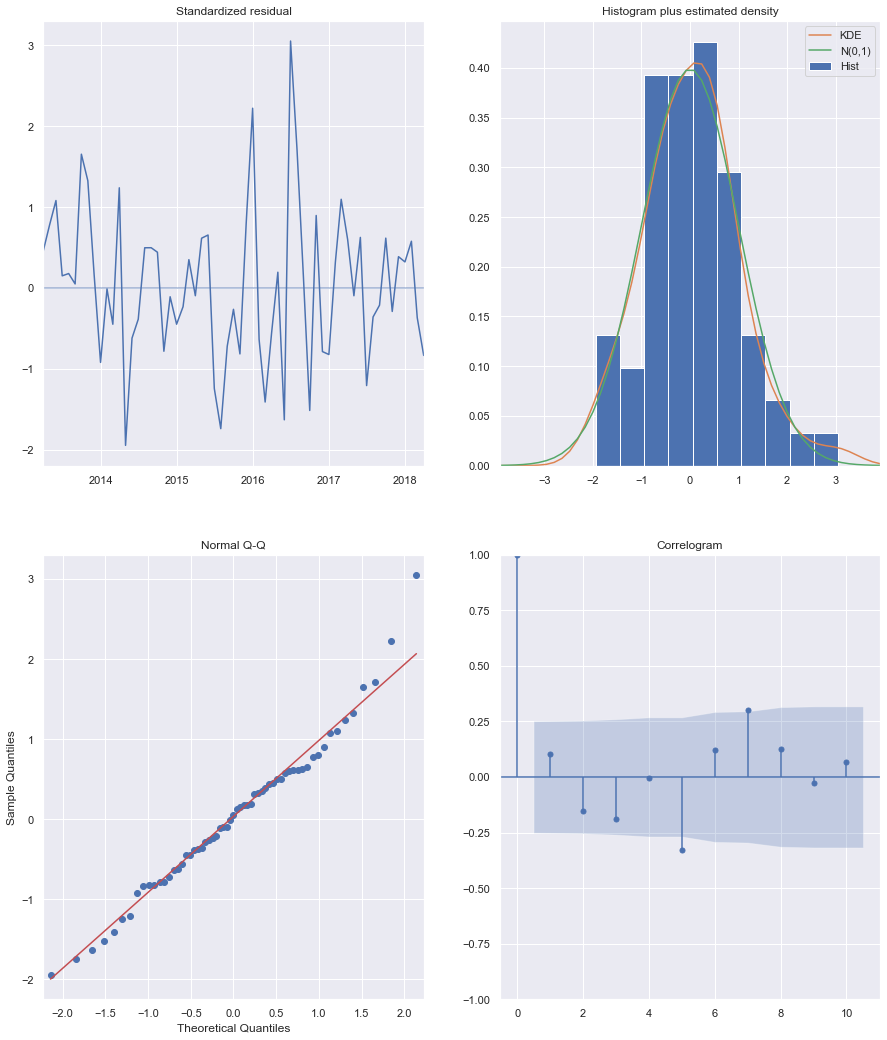

In [137]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [138]:
pred = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=False)
pred_conf = pred.conf_int()

In [139]:
# pred_conf

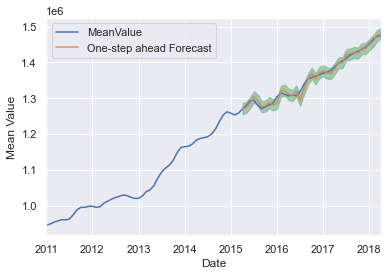

In [140]:
ax = df['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')
plt.legend()

plt.show()

In [141]:
# Get MSE?

In [142]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

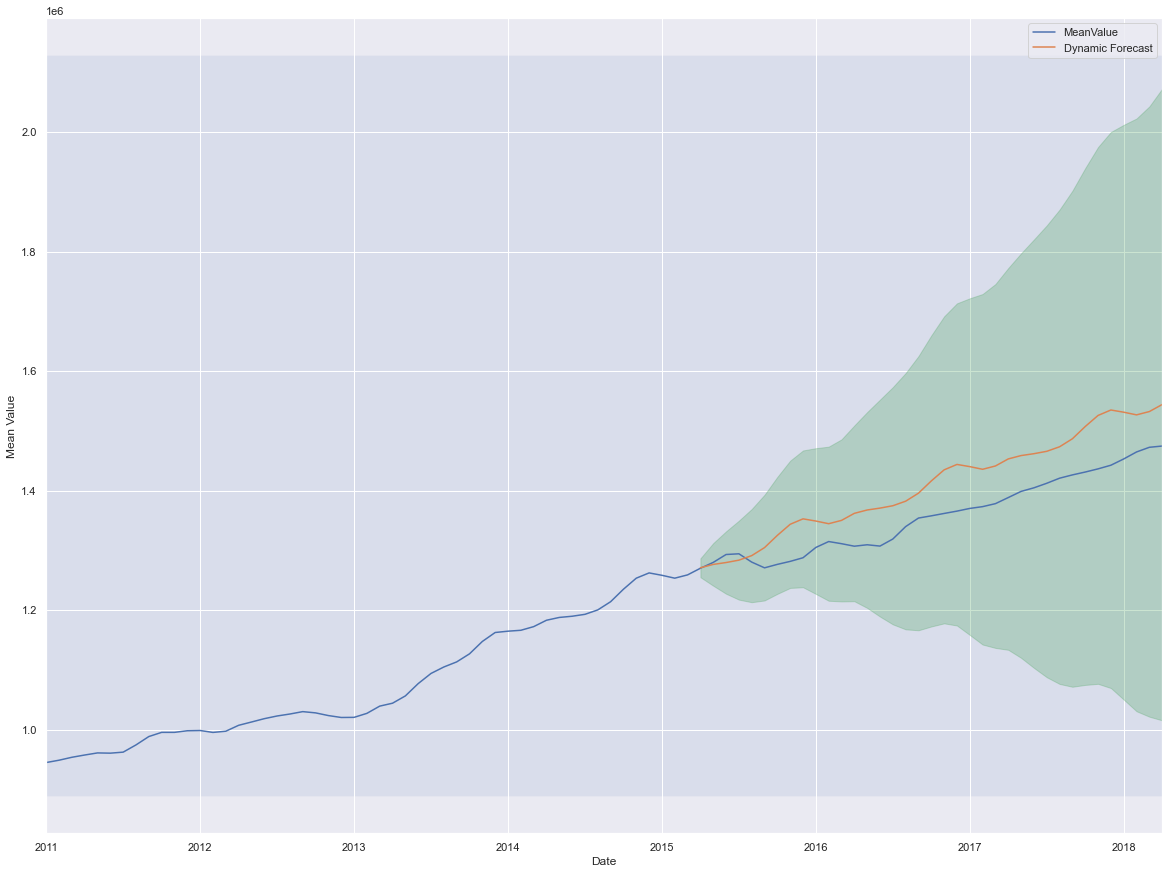

In [143]:
ax = df['2011':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-01-01'), pred.predicted_mean.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [144]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

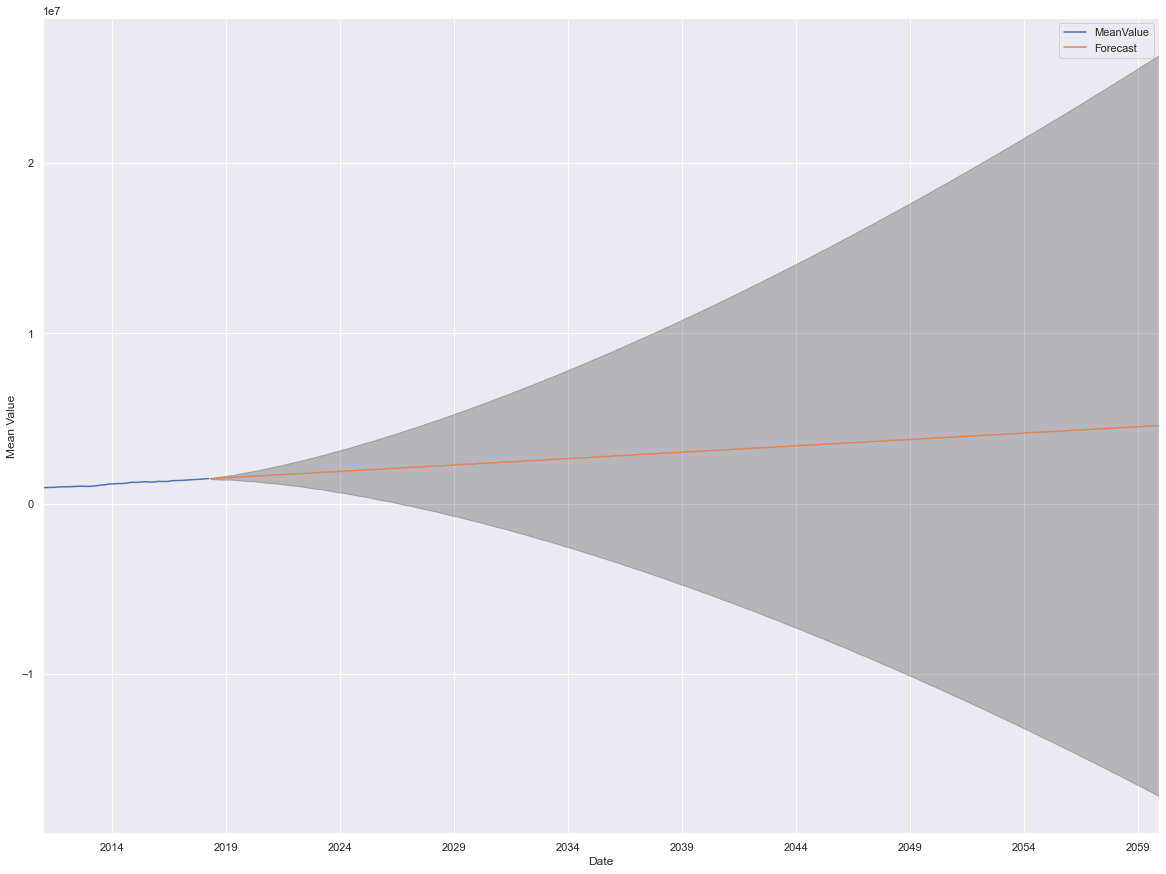

In [145]:
ax = df.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [158]:
ans = []
for df, name in zip(zip_dict, zip_list):
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue

In [206]:
# pip install pmdarima

In [207]:
# from pmdarima.arima import auto_arima
# stepwise_model = auto_arima(zip_df, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=65095.891, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=64484.788, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=65097.509, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=64265.092, Time=1.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=64092.053, Time=0.95 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=64397.531, Time=0.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=64266.051, Time=1.18 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=64267.918, Time=1.61 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AI

In [208]:
train = df.loc['2011-01-01':'2014-12-01']
test = df.loc['2015-01-01':]

In [209]:
# train
train_dict = {}
train_zip_list = train.ZipCode.unique()
for x in train_zip_list:
    ts = (train[train['ZipCode']==x]['MeanValue'].copy())
    ts.name = x 
    train_dict[x] = ts

In [210]:
train_df = pd.DataFrame(pd.concat(train_dict))

In [211]:
# test
test_dict = {}
test_zip_list = test.ZipCode.unique()
for x in test_zip_list:
    ts = (test[test['ZipCode']==x]['MeanValue'].copy())
    ts.name = x 
    test_dict[x] = ts

In [212]:
test_df = pd.DataFrame(pd.concat(test_dict))

In [213]:
stepwise_model.fit(train_df)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [214]:
future_forecast = stepwise_model.predict(n_periods=37)

In [215]:
future_forecast

array([1263197.26432184, 1264847.13210681, 1271540.00574114,
       1280154.99581433, 1287476.70368839, 1296491.4632976 ,
       1304460.81238115, 1311632.85386085, 1320612.3754483 ,
       1331875.87999086, 1343770.14941204, 1350718.67620648,
       1351842.59530576, 1355048.07885073, 1363270.02042597,
       1371364.10696976, 1379406.51648377, 1389883.87972285,
       1399213.88335559, 1407609.41919536, 1417927.01604744,
       1432942.67877641, 1449717.3780671 , 1459805.98951076,
       1461231.47496589, 1463404.51686983, 1470470.21283164,
       1479555.8771477 , 1486309.86525379, 1493634.73279262,
       1500589.48671839, 1508282.77309338, 1519251.51998013,
       1534950.31816686, 1550731.85944339, 1559420.12168113,
       1560614.48233469])

In [216]:
test = test_df

In [223]:
# future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
# pd.concat([test,future_forecast],axis=1)

In [222]:
# pd.concat([df,future_forecast],axis=1)